In [19]:
import pandas as pd
import numpy as np

In [20]:
#Read in the certificate feature alexa dataset
alexa = pd.read_csv("certificate features.alexa.csv")


In [21]:
alexa.head()

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class
0,www.yahoo.com,True,180,True,False,61,True,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
1,www.google.co.in,True,83,True,False,11,True,0,1,0,...,0,0,0,0,0,0,0,0,0,alexa
2,www.reddit.com,True,1100,True,False,826,True,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
3,world.taobao.com,True,74,True,False,61,True,1,0,0,...,0,0,0,0,0,0,0,0,0,alexa
4,www.google.co.jp,True,83,True,False,11,True,0,1,0,...,0,0,0,0,0,0,0,0,0,alexa


In [22]:
#Read in the certificate feature alexa dataset
phish = pd.read_csv("certificate features.phish.csv")

In [23]:
phish.head()

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class
0,yusqa.com,True,365,True,False,257,False,0,0,0,...,0,0,0,0,0,0,0,0,0,phish
1,yonnaforexbureau.gm,True,90,True,False,61,False,0,0,0,...,0,0,0,0,0,0,0,0,0,phish
2,www.serveradmin.gq,True,57,True,False,6,True,0,0,0,...,0,0,0,0,0,0,0,0,0,phish
3,themasterslive.com,True,90,True,False,1,False,0,0,0,...,0,0,0,0,0,0,0,0,0,phish
4,edicionsdeponent.com,True,90,True,False,7,False,0,0,0,...,0,0,0,0,0,0,0,0,0,phish


In [24]:
#merge alexa and phish datasets
df = pd.concat([phish,alexa], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [25]:
df.tail()

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class
7071,www.weihenstephaner.de,True,1095,True,False,566,False,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
7072,www.overnightprints.at,True,1187,True,False,881,False,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
7073,tierradegracia.net,True,191,True,False,0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
7074,fluffyaudio.com,True,365,True,False,274,False,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
7075,semirxb.world.tmall.com,True,354,True,False,19,True,1,0,0,...,0,0,0,0,0,0,0,0,0,alexa


In [26]:
#define features and target feature
x = df.iloc[:,1:7]
y = df.loc[:,"class"]

In [27]:
x.head()

,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn
0,True,365,True,False,257,False
1,True,90,True,False,61,False
2,True,57,True,False,6,True
3,True,90,True,False,1,False
4,True,90,True,False,7,False


In [28]:
y.head()

0    phish
1    phish
2    phish
3    phish
4    phish
Name: class, dtype: object

In [29]:
#convert target class to booleans

ylist = list(y)

count = 0
for i in ylist:
    if i == 'phish':
        ylist[count] = True
    elif i == 'alexa':
        ylist[count] = False
    count+=1

yboolean = pd.DataFrame(ylist, columns = ['target'])
yboolean.head()

,target
0,True
1,True
2,True
3,True
4,True


In [30]:
#create train and test dataframes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


# Instantiate dt
#dt = DecisionTreeClassifier(max_depth=3)
dt = DecisionTreeClassifier()

# Instantiate ada
#ada = AdaBoostClassifier(base_estimator=dt, learning_rate = 0.05, n_estimators = 200)
ada = AdaBoostClassifier(base_estimator=dt)

# Fit ada to the training set
ada.fit(x_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(x_test)[:,1]
y_pred_Ada = ada.predict(x_test)

from sklearn.metrics import accuracy_score

#AdaBoost accuracy
print('Accuracy attained from ADABoost model:', accuracy_score(y_test,y_pred_Ada))

Accuracy attained from ADABoost model: 0.919047619047619


In [32]:

from sklearn.model_selection import GridSearchCV

'''This loops iterates through different decision tree max depths and performs a grid search on the
AdaBoost model for each max depth'''
list1 = []
for i in range(1, 10, 2):

    param_grid = {
     'n_estimators': [50, 100, 200],
     'learning_rate' : [0.01,0.05,0.1,0.3,1],
     }

    ada2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i))
    ada_search = GridSearchCV(ada2, param_grid, cv=3, scoring = 'accuracy')
    ada_search.fit(x_train, y_train)
    list1.append([pd.DataFrame(ada_search.cv_results_),i])


In [33]:
#gridsearch and for loop results
ada_cv = pd.DataFrame()
for j in list1:
    j[0]['max_depth'] = j[1]
    ada_cv = pd.concat([j[0], ada_cv])
ada_cv = ada_cv[['param_learning_rate', 'param_n_estimators', 'params','max_depth', 'mean_test_score', 'rank_test_score']]
ada_cv.sort_values(by=['mean_test_score'], ascending = False).head()

,param_learning_rate,param_n_estimators,params,max_depth,mean_test_score,rank_test_score
2,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",5,0.926913,1
5,0.05,200,"{'learning_rate': 0.05, 'n_estimators': 200}",3,0.926169,1
3,0.05,50,"{'learning_rate': 0.05, 'n_estimators': 50}",5,0.925871,2
0,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",7,0.925127,1
1,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",5,0.924680,3


In [34]:
#Run AdaBoost using the best parameters and output accuracy
dt_best = DecisionTreeClassifier(max_depth=3)
ada_best = AdaBoostClassifier(base_estimator=dt_best, n_estimators = 200, learning_rate= 0.05)

ada_best.fit(x_train, y_train)
y_pred_Ada_best = ada_best.predict(x_test)
print('Accuracy attained from best ADABoost model:', accuracy_score(y_test,y_pred_Ada_best))

Accuracy attained from best ADABoost model: 0.9297619047619048


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
#Fit a basic random forest classifier to certification data
forest_phish = RandomForestClassifier()
forest_phish.fit(x_train,y_train)

y_pred_RF = forest_phish.predict(x_test)

#Evaluate test set accuracy
print('Accuracy attained from RF model:', accuracy_score(y_test,y_pred_RF))

Accuracy attained from RF model: 0.9208333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
#gridsearch on random forest paramaters n_estimators, max_features, max_depth, bootstrap
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [0.1, 0.3, 0.5, 0.8, 1.0], 'max_depth':[2,4,7,10, 15]}, 
    #{'n_estimators': [50, 70, 90], 'max_features': [8, 10, 12, 15]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [0.1, 0.3, 0.5, 0.8, 1.0], 'max_depth':[2,4,7,10, 15]}]

forest_phish = RandomForestClassifier()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_forest = GridSearchCV(forest_phish, param_grid, cv=3,
                           scoring='accuracy')
grid_forest.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [38]:
#Random forest best paramaters
tuned_forest = pd.DataFrame(grid_forest.cv_results_)[['param_max_depth','param_max_features', 'param_bootstrap','param_n_estimators','params', 'mean_test_score', 'rank_test_score']]
tuned_forest.sort_values(by='mean_test_score', ascending= False).head()

,param_max_depth,param_max_features,param_bootstrap,param_n_estimators,params,mean_test_score,rank_test_score
49,10,0.3,NaN,10,"{'max_depth': 10, 'max_features': 0.3, 'n_esti...",0.928699,1
50,10,0.3,NaN,30,"{'max_depth': 10, 'max_features': 0.3, 'n_esti...",0.928252,2
59,10,1,NaN,30,"{'max_depth': 10, 'max_features': 1.0, 'n_esti...",0.927806,3
115,7,0.8,False,10,"{'bootstrap': False, 'max_depth': 7, 'max_feat...",0.927210,4
53,10,0.5,NaN,30,"{'max_depth': 10, 'max_features': 0.5, 'n_esti...",0.927210,4


In [39]:
#Random forest fit with best parameters on train set and predicted against test set
forest_phish = RandomForestClassifier(max_depth = 10, max_features = 0.3, n_estimators = 10)
forest_phish.fit(x_train,y_train)

y_pred_best_RF = forest_phish.predict(x_test)

#Evaluate test set accuracy
print('Accuracy attained from RF model:', accuracy_score(y_test,y_pred_best_RF))

Accuracy attained from RF model: 0.9291666666666667


In [40]:
#Fit a basic CART classifier to certification data
dt = DecisionTreeClassifier()


#Fit dt to the training set
dt.fit(x_train,y_train)

#Predict test set labels
y_pred_CART = dt.predict(x_test)

#Evaluate test set accuracy
print('Accuracy attained from CART model:', accuracy_score(y_test,y_pred_CART))

Accuracy attained from CART model: 0.9214285714285714


In [41]:
#run gridsearch on CART model for criterion, max_depth, and min_weight_fraction_leaf parameters
from sklearn.model_selection import GridSearchCV

# list1 = []

param_grid = {
 'criterion': ['gini', 'entropy'],
 'max_depth': [1,2,4,8],
 'min_weight_fraction_leaf' : [0, 0.005, 0.02, 0.05, 0.2, 0.5],
 }

dt2 = DecisionTreeClassifier()
dt2_search = GridSearchCV(dt2, param_grid, cv=3, scoring = 'accuracy')
dt2_search.fit(x_train, y_train)
# list1.append(pd.DataFrame(dt2_search.cv_results_))


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8],
                         

In [42]:
#Display best CART grid search parameters
dt2_cv = pd.DataFrame(dt2_search.cv_results_)
dt2_cv = dt2_cv[['param_criterion', 'param_max_depth', 'param_min_weight_fraction_leaf','params', 'mean_test_score', 'rank_test_score']]

dt2_cv.sort_values(by='mean_test_score', ascending = False).head()

,param_criterion,param_max_depth,param_min_weight_fraction_leaf,params,mean_test_score,rank_test_score
42,entropy,8,0,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.925275,1
18,gini,8,0,"{'criterion': 'gini', 'max_depth': 8, 'min_wei...",0.922745,2
36,entropy,4,0,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.917237,3
12,gini,4,0,"{'criterion': 'gini', 'max_depth': 4, 'min_wei...",0.916940,4
43,entropy,8,0.005,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.916940,4


In [43]:
dt2_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_weight_fraction_leaf': 0}

In [44]:

CART_best = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_weight_fraction_leaf= 0)
CART_best.fit(x_train, y_train)
#Predict test set labels
CART_best_pred = CART_best.predict(x_test)

#Evaluate test set accuracy
print('Accuracy attained from CART model:', accuracy_score(y_test,CART_best_pred))

Accuracy attained from CART model: 0.9261904761904762


In [45]:
#Fit a basic KNN classifier to certification data
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
KNN_base_pred = classifier.predict(x_test)

#Evaluate test set accuracy
print('Accuracy attained from KNN model:', accuracy_score(y_test,KNN_base_pred))

Accuracy attained from KNN model: 0.9238095238095239


In [46]:
# Applying Grid Search to find the best model and the best parameters for KNN
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1,2,3,5,10,20,50,100,200,500],
    'weights': ['uniform','distance'],
    'metric' : ['euclidean','manhattan']}
grid_search_KNN = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5, verbose=1, n_jobs =-1)
grid_search_KNN.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 5, 10, 20, 50, 100, 200, 500],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [47]:
#Display best params for KNN
KNN_best = pd.DataFrame(grid_search_KNN.cv_results_)
KNN_best[['rank_test_score','mean_test_score', 'params','param_weights', 'param_metric', 'param_n_neighbors']].sort_values(by='mean_test_score', ascending = False).head()

,rank_test_score,mean_test_score,params,param_weights,param_metric,param_n_neighbors
29,1,0.918130,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",distance,manhattan,10
9,2,0.917982,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",distance,euclidean,10
11,3,0.915451,"{'metric': 'euclidean', 'n_neighbors': 20, 'we...",distance,euclidean,20
31,4,0.915302,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",distance,manhattan,20
27,5,0.915153,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",distance,manhattan,5


In [48]:
grid_search_KNN.best_score_

0.918130395951176

In [49]:
grid_search_KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [50]:
KNN_best = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 10, weights= 'distance')
KNN_best.fit(x_train, y_train)
KNN_best_pred = KNN_best.predict(x_test)
KNN_best_pred
print('Accuracy attained from best KNN model:', accuracy_score(y_test,KNN_best_pred))

Accuracy attained from best KNN model: 0.924404761904762


In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
log_y_pred = clf.predict(x_test)
accuracy_score(y_test,log_y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8428571428571429

In [112]:
from sklearn.metrics import confusion_matrix

classification_results = [['AdaBoost', accuracy_score(y_test,y_pred_Ada), accuracy_score(y_test,y_pred_Ada_best)],
                ['CART', accuracy_score(y_test,y_pred_CART), accuracy_score(y_test,CART_best_pred)],
                ['KNN', accuracy_score(y_test,KNN_base_pred), accuracy_score(y_test,KNN_best_pred)],
                ['Random Forest', accuracy_score(y_test,y_pred_RF), accuracy_score(y_test,y_pred_best_RF), 0.926],
                #['Logistic Regression', accuracy_score(y_test,log_y_pred)]
                         ]


confusion_matrix_all = [['AdaBoost Base', confusion_matrix(y_test,y_pred_Ada)],
                ['AdaBoost Tuned', confusion_matrix(y_test,y_pred_Ada_best)],
                ['Random Forest Base', confusion_matrix(y_test,y_pred_RF)],
                ['Random Forest Tuned', confusion_matrix(y_test,y_pred_best_RF)],
                ['CART Base', confusion_matrix(y_test,y_pred_CART)],
                ['CART Tuned', confusion_matrix(y_test,CART_best_pred)],
                ['KNN Base', confusion_matrix(y_test,KNN_base_pred)],
                ['KNN Tuned', confusion_matrix(y_test,KNN_best_pred)],
                #['Logistic Regression',confusion_matrix(y_test,log_y_pred)]
                       ]

In [113]:
results = pd.DataFrame(classification_results, columns= ['Model','Base Accuracy', 'Tuned Accuracy', 'Phishmon Accuracy']).sort_values(by='Tuned Accuracy', ascending=False).round(decimals=3)

In [114]:
results
#Note that not all tuned models performed better on the test set.  This is likely due to the models not
#showing significant improvment with tuning, and a different random seed in the base run resulting in
#better slightly better accuracy

,Model,Base Accuracy,Tuned Accuracy,Phishmon Accuracy
0,AdaBoost,0.919,0.930,NaN
3,Random Forest,0.921,0.929,0.926
1,CART,0.921,0.926,NaN
2,KNN,0.924,0.924,NaN


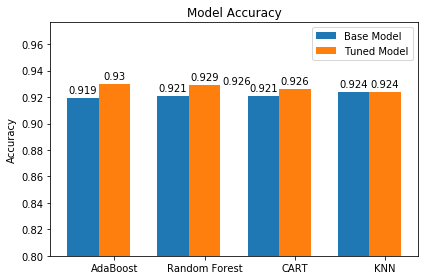

In [118]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = results['Model']
Base = results['Base Accuracy']
Tuned = results['Tuned Accuracy']
Phishmon = results['Phishmon Accuracy']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, Base, width, label='Base Model')
rects2 = ax.bar(x, Tuned, width, label='Tuned Model')
#rects3 = ax.bar(x + width, Phishmon, width, label='Phishmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.gca().set_ylim(bottom=0.8)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [119]:
#Confusion matrix of all results
pd.DataFrame(confusion_matrix_all, columns= ['Model', 'Confusion Matrix'])

,Model,Confusion Matrix
0,AdaBoost Base,"[[1348, 68], [68, 196]]"
1,AdaBoost Tuned,"[[1383, 33], [85, 179]]"
2,Random Forest Base,"[[1352, 64], [69, 195]]"
3,Random Forest Tuned,"[[1373, 43], [76, 188]]"
4,CART Base,"[[1357, 59], [73, 191]]"
5,CART Tuned,"[[1371, 45], [79, 185]]"
6,KNN Base,"[[1375, 41], [87, 177]]"
7,KNN Tuned,"[[1374, 42], [85, 179]]"


In [120]:
#Confusion matrix of all results
for i in confusion_matrix_all:
    print(i[0])
    print(i[1])

AdaBoost Base
[[1348   68]
 [  68  196]]
AdaBoost Tuned
[[1383   33]
 [  85  179]]
Random Forest Base
[[1352   64]
 [  69  195]]
Random Forest Tuned
[[1373   43]
 [  76  188]]
CART Base
[[1357   59]
 [  73  191]]
CART Tuned
[[1371   45]
 [  79  185]]
KNN Base
[[1375   41]
 [  87  177]]
KNN Tuned
[[1374   42]
 [  85  179]]
